In [102]:
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from gudhi import CubicalComplex
import matplotlib.patches as patches

[[0.9678995 1.7084173]]


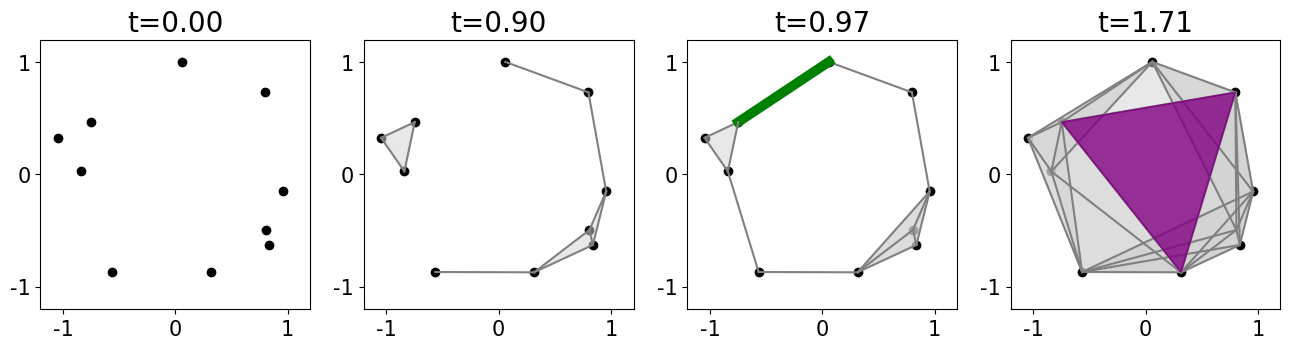

In [146]:
np.random.seed(2025)
t = np.random.random(10)*2*np.pi
X = np.array([np.cos(t), np.sin(t)]).T+ np.random.normal(0, 0.1, (10, 2))

PD = ripser(X)['dgms']
print(PD[1])

fig, ax = plt.subplots(1,4, figsize=(16,4))

for k, t in enumerate([0, 0.9, PD[1][0][0], PD[1][0][1]+0.001]):
    ax[k].scatter(X[:,0], X[:,1], c='k')
    for i in range(X.shape[0]):
        for j in range(i+1, X.shape[0]):
            if np.linalg.norm(X[i]-X[j]) < t:
                ax[k].plot([X[i,0], X[j,0]], [X[i,1], X[j,1]], c='gray')
                if np.abs(np.max(np.linalg.norm(X[i] - X[j]) - PD[1][0][0])) < 1e-5 and k == 2:
                    ax[k].plot([X[i,0], X[j,0]], [X[i,1], X[j,1]], c='green', linewidth=7)
            for l in range(j+1, X.shape[0]):
                if np.linalg.norm(X[i]-X[j]) < t and np.linalg.norm(X[j]-X[l]) < t and np.linalg.norm(X[l]-X[i]) < t:
                    if max(np.linalg.norm(X[i] - X[j]), np.linalg.norm(X[j] - X[l]), np.linalg.norm(X[l] - X[i])) < PD[1][0][1]+1e-5:
                        triangle = patches.Polygon([X[i], X[j], X[l]], closed=True, color='lightgray', alpha=0.5)
                        ax[k].add_patch(triangle)
                    if i == 0 and j == 4 and l == 9 and k == 3:
                        triangle = patches.Polygon([X[i], X[j], X[l]], closed=True, color='purple', alpha=0.8, zorder=100)
                        ax[k].add_patch(triangle)
    
    ax[k].set_xlim(-1.2, 1.2)
    ax[k].set_ylim(-1.2, 1.2)
    ax[k].set_yticks([-1,0,1], labels =[-1,0,1], fontsize=15)
    ax[k].set_xticks([-1,0,1], labels =[-1,0,1], fontsize=15)
    ax[k].set_aspect('equal', adjustable='box')
    ax[k].set_title(f't={t:.2f}', fontsize=20)

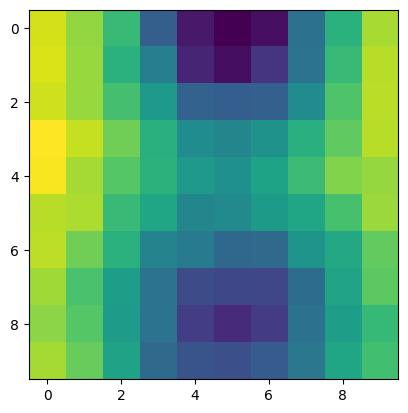

In [118]:
np.random.seed(2026)
M = np.random.random((10,10))*0.1 + 1.2
#place two gaussians on the grid
center1 = np.array([0,5])
center2 = np.array([8,5])
for i in range(10):
    for j in range(10):
        p = np.array([i,j])
        M[i,j] -= 1.2*np.exp(-np.linalg.norm(p - center1)**2/3**2) + np.exp(-np.linalg.norm(p - center2)**2/4**2)
plt.imshow(M)

[[0.21582147 0.64956725]
 [0.08043941        inf]]


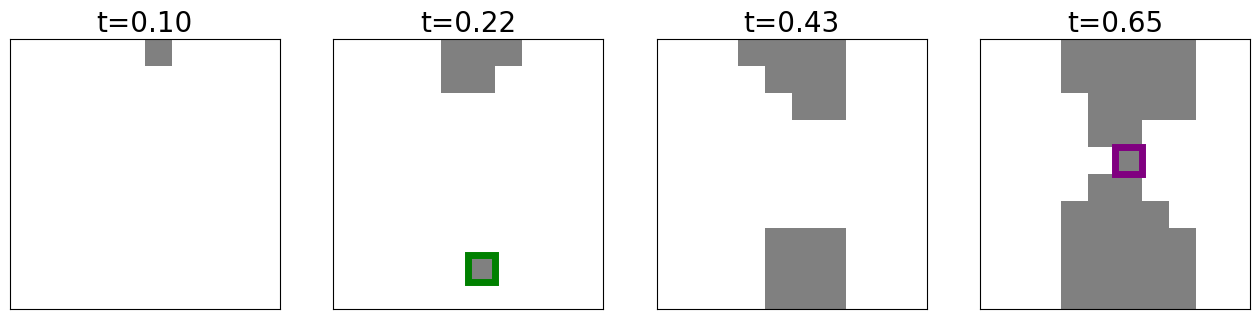

In [121]:
cc = CubicalComplex(top_dimensional_cells=M)
cc.persistence()
PD = cc.persistence_intervals_in_dimension(0)
print(PD)

fig, ax = plt.subplots(1,4, figsize=(16,4))
for k, t in enumerate([0.1, PD[0][0]+1e-6, 0.5*(PD[0][0]+PD[0][1]), PD[0][1]+0.001]):
    ax[k].imshow(M < t, cmap='binary', alpha=0.5)
    ax[k].set_title(f't={t:.2f}', fontsize=20)
    ax[k].set_xticks([], labels =[])
    ax[k].set_yticks([], labels =[])
    if k == 1:
        rect = patches.Rectangle(
            (4.5, 7.5), 
            1, 1, 
            linewidth=5, 
            edgecolor='green', 
            facecolor='none', zorder=100
        )
        ax[k].add_patch(rect)
    if k == 3:
        rect = patches.Rectangle(
            (4.5, 3.5), 
            1, 1, 
            linewidth=5, 
            edgecolor='purple', 
            facecolor='none', zorder=100
        )
        ax[k].add_patch(rect)